<a href="https://colab.research.google.com/github/LuisPablo19/Valores-Atipicos/blob/main/Act_3_2_(Valores_atipicos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 3.2 (Valores atípicos por DataFrame)**
##Luis Pablo Padilla Barbosa
##A00572040

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files 

In [ ]:
df= pd.read_excel("Gastos y costos 2020 (SN).xlsx")
df1= pd.read_excel("Gastos y costos 2021 (SN).xlsx")
df2= pd.read_excel("Gastos y costos 2022 (SN).xlsx")
df3= pd.read_excel("Gastos y costos 2023 (SN).xlsx")

###Gastos y costos 2020

In [ ]:
df.info()

In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
y = df._get_numeric_data()
fig = plt.figure(figsize =(15, 8))
y.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

Varianza

In [ ]:
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [ ]:
outliers= y[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

In [ ]:
data= y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data

In [ ]:
valores_nulos=data.isnull().sum()
valores_nulos

In [ ]:
data_clean=data.copy()
data_clean=data_clean.fillna(round(data.mean(),1))
data_clean

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [ ]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
Columna1     0
dtype: int64

Cuantiles

In [ ]:
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC              1.00000
IMPORTE      6929.04500
IVA           990.00000
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX     7983.17750
TOTAL SAT    8269.28375
Columna1        0.00000
dtype: float64
Limite inferior permitido TC              1.00000
IMPORTE     -4127.07500
IVA          -594.00000
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX    -4783.14250
TOTAL SAT   -4832.96625
Columna1        0.00000
dtype: float64


In [ ]:
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,NaN,NaN,2248.28,NaN,NaN,NaN,16300.00,14051.72
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,10694.25,1711.08,NaN,NaN,12405.33,12405.33,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_iqr= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,NaN,0.0,0.0,2248.28,NaN,NaN
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [ ]:
valores_nulos=data_iqr.isnull().sum()
valores_nulos

TC             9
IMPORTE      424
IVA          441
RET ISR       45
RET IVA      253
TOTAL MX     420
TOTAL SAT    426
Columna1     240
dtype: int64

In [ ]:
data_clean_iqr=data_iqr.copy()
data_clean_iqr=data_clean_iqr.fillna(round(data_iqr.mean(),1))
data_clean_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,150.70,0.0,0.0,2248.28,1333.00,0.0
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,1.0,1082.00,150.70,0.0,0.0,1239.10,1333.00,0.0
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [ ]:
df = df.drop(y.columns, axis = 1)
Datos_limpios = pd.concat([df, data_clean_iqr], axis=1)
Datos_limpios

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,TIPO,STATUS,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,1.0,0.00,150.70,0.0,0.0,2248.28,1333.00,0.0
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,1.0,1082.00,150.70,0.0,0.0,1239.10,1333.00,0.0
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,Pago,P,Vigente,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,2020-12-01,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,32011 MAGNA,I,Vigente,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,2020-12-01,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,I,Vigente,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,2020-12-01,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,REF VICTORIA GROSELLA 3 LT PET NR,I,Vigente,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,2020-12-01,634875,8DFF4F01-2F8B-4085-B116-05A314108B02,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,I,Vigente,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [ ]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
TIPO           0
STATUS         0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Columna1       0
dtype: int64

In [ ]:
Datos_limpios.to_csv("Gastos y costos 2020 (Datos limpios).csv")
files.download("Gastos y costos 2020 (Datos limpios).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Gastos y costos 2021

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   3035 non-null   int64         
 1   FECHA        3035 non-null   datetime64[ns]
 2   FOLIO        3035 non-null   object        
 3   UUID         3035 non-null   object        
 4   RFC          3035 non-null   object        
 5   PROVEEDOR    3035 non-null   object        
 6   TIPO GASTO   3035 non-null   object        
 7   DESCRIPCION  3035 non-null   object        
 8   MP           3035 non-null   object        
 9   TC           3035 non-null   float64       
 10  IMPORTE      3035 non-null   float64       
 11  IVA          3035 non-null   float64       
 12  RET ISR      3035 non-null   float64       
 13  RET IVA      3035 non-null   float64       
 14  TOTAL MX     3035 non-null   float64       
 15  TOTAL SAT    3035 non-null   float64       
 16  TIPO  

In [ ]:
df1 = df1.drop(['Unnamed: 0'], axis = 1)

<Figure size 1500x800 with 0 Axes>

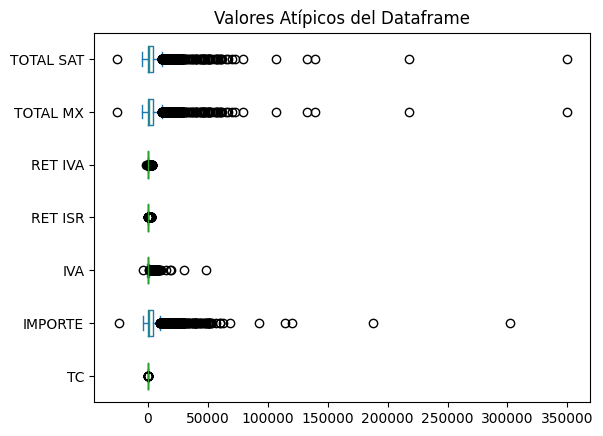

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
y = df1._get_numeric_data()
fig = plt.figure(figsize =(15, 8))
y.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

Varianza

In [ ]:
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               6.286851
IMPORTE      36154.569820
IVA           5464.876801
RET ISR        900.150092
RET IVA       1200.884906
TOTAL MX     40680.462408
TOTAL SAT    40671.985064
dtype: float64
Limite inferior permitido TC              -3.981398
IMPORTE     -27625.812771
IVA          -4276.811367
RET ISR       -833.428945
RET IVA      -1053.848939
TOTAL MX    -31176.694132
TOTAL SAT   -31129.503410
dtype: float64


In [ ]:
outliers= y[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data= y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [ ]:
valores_nulos=data.isnull().sum()
valores_nulos

TC           24
IMPORTE      43
IVA          38
RET ISR      32
RET IVA      81
TOTAL MX     40
TOTAL SAT    40
dtype: int64

In [ ]:
data_clean=data.copy()
data_clean=data_clean.fillna(round(data.mean(),1))
data_clean

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [ ]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

Cuantiles

In [ ]:
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC               1.0000
IMPORTE      10127.7125
IVA           1381.4750
RET ISR          0.0000
RET IVA          0.0000
TOTAL MX     11580.2750
TOTAL SAT    11456.0225
dtype: float64
Limite inferior permitido TC              1.0000
IMPORTE     -6076.6275
IVA          -828.8850
RET ISR         0.0000
RET IVA         0.0000
TOTAL MX    -6948.1650
TOTAL SAT   -6818.3175
dtype: float64


In [ ]:
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,NaN,22826.46,NaN,NaN,NaN,23532.04,23532.04
3033,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_iqr= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3031,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3032,1.0,NaN,705.58,0.0,0.0,NaN,NaN
3033,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
valores_nulos=data_iqr.isnull().sum()
valores_nulos

TC            24
IMPORTE      336
IVA          342
RET ISR       56
RET IVA      212
TOTAL MX     347
TOTAL SAT    351
dtype: int64

In [ ]:
data_clean_iqr=data_iqr.copy()
data_clean_iqr=data_clean_iqr.fillna(round(data_iqr.mean(),1))
data_clean_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3031,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3032,1.0,1699.50,705.58,0.0,0.0,1903.4,1910.9
3033,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
df1 = df1.drop(y.columns, axis = 1)
Datos_limpios = pd.concat([df1, data_clean_iqr], axis=1)
Datos_limpios

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,PUE,P,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,I,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,1.0,1699.50,705.58,0.0,0.0,1903.4,1910.9
3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TIPO           0
STATUS         0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
dtype: int64

In [ ]:
Datos_limpios.to_csv("Gastos y costos 2021 (Datos limpios).csv")
files.download("Gastos y costos 2021 (Datos limpios).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Gastos y costos 2022

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   2577 non-null   int64         
 1   Fecha        2577 non-null   datetime64[ns]
 2   Folio        2577 non-null   object        
 3   UUID         2577 non-null   object        
 4   RFC          2577 non-null   object        
 5   Proveedor    2577 non-null   object        
 6   TIPO GASTO   2577 non-null   object        
 7   Descripción  2577 non-null   object        
 8   MP           2577 non-null   object        
 9   TC           2577 non-null   float64       
 10  Importe      2577 non-null   float64       
 11  IVA          2577 non-null   float64       
 12  RET ISR      2577 non-null   float64       
 13  RET IVA      2577 non-null   float64       
 14  TOTAL MX     2577 non-null   float64       
 15  TOTAL SAT    2577 non-null   float64       
 16  Tipo  

**Cambiar**

In [ ]:
df2 = df2.drop(['Unnamed: 0'], axis = 1)

<Figure size 1500x800 with 0 Axes>

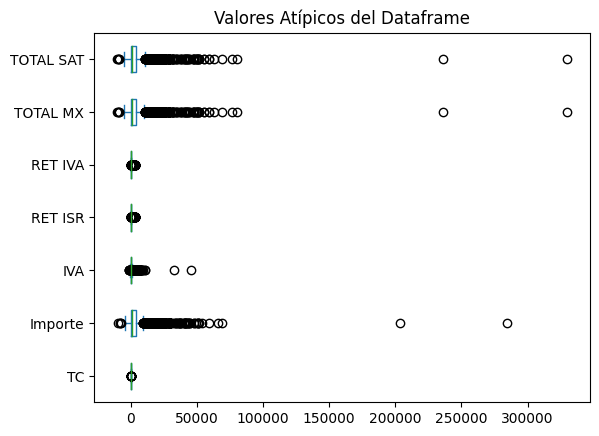

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
y = df2._get_numeric_data()
fig = plt.figure(figsize =(15, 8))
y.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

Varianza

In [ ]:
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               5.940742
Importe      34975.501132
IVA           5048.646001
RET ISR        977.619941
RET IVA       1046.847384
TOTAL MX     39054.094273
TOTAL SAT    39095.543969
dtype: float64
Limite inferior permitido TC              -3.672111
Importe     -26990.441616
IVA          -4069.819702
RET ISR       -902.558225
RET IVA       -964.592475
TOTAL MX    -30247.525081
TOTAL SAT   -30172.959879
dtype: float64


In [ ]:
outliers= y[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data= y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [ ]:
valores_nulos=data.isnull().sum()
valores_nulos

TC           18
Importe      36
IVA          31
RET ISR      32
RET IVA      32
TOTAL MX     36
TOTAL SAT    36
dtype: int64

In [ ]:
data_clean=data.copy()
data_clean=data_clean.fillna(round(data.mean(),1))
data_clean

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [ ]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

Cuantiles

In [ ]:
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC               1.000
Importe       9058.900
IVA           1031.150
RET ISR          0.000
RET IVA          0.000
TOTAL MX     10374.700
TOTAL SAT    10485.475
dtype: float64
Limite inferior permitido TC              1.000
Importe     -5435.340
IVA          -618.690
RET ISR         0.000
RET IVA         0.000
TOTAL MX    -6224.820
TOTAL SAT   -6291.285
dtype: float64


In [ ]:
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2573,NaN,17310.3,NaN,NaN,NaN,17826.62,17826.62
2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_iqr= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
1,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
2,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3,1.0,0.00,0.00,0.0,0.0,0.0,0.0
4,1.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2573,1.0,NaN,516.32,0.0,0.0,NaN,NaN
2574,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2575,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
valores_nulos=data_iqr.isnull().sum()
valores_nulos

TC            18
Importe      305
IVA          303
RET ISR       71
RET IVA       70
TOTAL MX     291
TOTAL SAT    288
dtype: int64

In [ ]:
data_clean_iqr=data_iqr.copy()
data_clean_iqr=data_clean_iqr.fillna(round(data_iqr.mean(),1))
data_clean_iqr

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
1,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
2,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3,1.0,0.00,0.00,0.0,0.0,0.0,0.0
4,1.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2573,1.0,1449.20,516.32,0.0,0.0,1711.5,1782.0
2574,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2575,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
df2 = df2.drop(y.columns, axis = 1)
Datos_limpios = pd.concat([df2, data_clean_iqr], axis=1)
Datos_limpios

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,I,Vigente,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,I,Vigente,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,I,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,P,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,P,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,1.0,1449.20,516.32,0.0,0.0,1711.5,1782.0
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,PUE,P,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PUE,P,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
Tipo           0
Status         0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
dtype: int64

In [ ]:
Datos_limpios.to_csv("Gastos y costos 2022 (Datos limpios).csv")
files.download("Gastos y costos 2022 (Datos limpios).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Gastos y costos 2022

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   397 non-null    int64         
 1   Fecha        397 non-null    datetime64[ns]
 2   Folio        397 non-null    object        
 3   UUID         397 non-null    object        
 4   RFC          397 non-null    object        
 5   Proveedor    397 non-null    object        
 6   TIPO GASTO   397 non-null    object        
 7   Descripción  397 non-null    object        
 8   MP           397 non-null    object        
 9   FP           397 non-null    int64         
 10  TC           397 non-null    float64       
 11  Importe      397 non-null    float64       
 12  IVA          397 non-null    float64       
 13  RET ISR      397 non-null    float64       
 14  RET IVA      397 non-null    float64       
 15  TOTAL MX     397 non-null    float64       
 16  TOTAL SA

**Cambiar**

In [ ]:
df3 = df3.drop(['Unnamed: 0'], axis = 1)

<Figure size 1500x800 with 0 Axes>

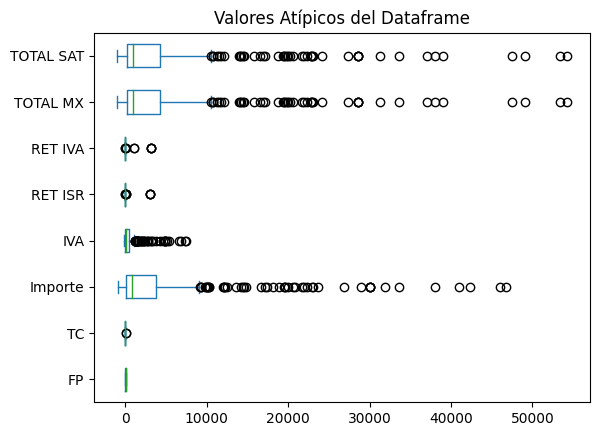

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
y = df3._get_numeric_data()
fig = plt.figure(figsize =(15, 8))
y.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

Varianza

In [ ]:
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido FP             197.879854
TC               4.957143
Importe      26557.244156
IVA           3761.774707
RET ISR        931.175004
RET IVA       1022.471745
TOTAL MX     29218.464899
TOTAL SAT    29218.464899
dtype: float64
Limite inferior permitido FP             -90.207310
TC              -2.774030
Importe     -18708.366775
IVA          -2766.954304
RET ISR       -869.142712
RET IVA       -947.124289
TOTAL MX    -20512.146863
TOTAL SAT   -20512.146863
dtype: float64


In [ ]:
outliers= y[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data= y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,5,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [ ]:
valores_nulos=data.isnull().sum()
valores_nulos

FP            0
TC            2
Importe      13
IVA          13
RET ISR       4
RET IVA       6
TOTAL MX      9
TOTAL SAT     9
dtype: int64

In [ ]:
data_clean=data.copy()
data_clean=data_clean.fillna(round(data.mean(),1))
data_clean

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,5,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [ ]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

Cuantiles

In [ ]:
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido FP             243.00
TC               1.00
Importe       9075.43
IVA           1120.00
RET ISR          0.00
RET IVA          0.00
TOTAL MX     10527.50
TOTAL SAT    10527.50
dtype: float64
Limite inferior permitido FP           -141.00
TC              1.00
Importe     -5259.05
IVA          -672.00
RET ISR         0.00
RET IVA         0.00
TOTAL MX    -6100.50
TOTAL SAT   -6100.50
dtype: float64


In [ ]:
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1352.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,18071.52,NaN,NaN,NaN,18753.92,18753.92
395,NaN,NaN,14472.32,NaN,NaN,NaN,14472.32,14472.32


In [ ]:
data_iqr= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99,1.0,8454.37,NaN,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3,1.0,NaN,682.40,0.0,0.0,NaN,NaN
395,5,1.0,NaN,0.00,0.0,0.0,NaN,NaN


In [ ]:
valores_nulos=data_iqr.isnull().sum()
valores_nulos

FP            0
TC            2
Importe      50
IVA          49
RET ISR       9
RET IVA       9
TOTAL MX     46
TOTAL SAT    46
dtype: int64

In [ ]:
data_clean_iqr=data_iqr.copy()
data_clean_iqr=data_clean_iqr.fillna(round(data_iqr.mean(),1))
data_clean_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99,1.0,8454.37,176.80,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3,1.0,1521.50,682.40,0.0,0.0,1845.00,1845.00
395,5,1.0,1521.50,0.00,0.0,0.0,1845.00,1845.00


In [ ]:
df3 = df3.drop(y.columns, axis = 1)
Datos_limpios = pd.concat([df3, data_clean_iqr], axis=1)
Datos_limpios

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PUE,P,Vigente,99,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PUE,P,Vigente,99,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,I,Vigente,99,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,I,Vigente,99,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,I,Vigente,99,1.0,8454.37,176.80,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,I,Vigente,1,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,3,1.0,1521.50,682.40,0.0,0.0,1845.00,1845.00
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,I,Vigente,5,1.0,1521.50,0.00,0.0,0.0,1845.00,1845.00


In [ ]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
Tipo           0
Status         0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
dtype: int64

In [ ]:
Datos_limpios.to_csv("Gastos y costos 2023 (Datos limpios).csv")
files.download("Gastos y costos 2023 (Datos limpios).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>